In [82]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
from pathlib import Path

In [32]:
city_bike = pd.read_csv('city_bike.csv')
city_bike.head(5)

,name,latitude,longitude,free_bikes,empty_slots
0,Ravenswood Ave & Lawrence Ave,41.969090,-87.674237,15,31
1,Lake Park Ave & 56th St,41.793242,-87.587782,11,8
2,Ada St & Washington Blvd,41.882830,-87.661206,4,10
3,Ashland Ave & Grace St,41.950687,-87.668700,8,7
4,Clark St & Wrightwood Ave,41.929546,-87.643118,9,5


In [34]:
four_rest = pd.read_csv('foursquar_park.csv')
four_rest.head(5)

,name,location.formatted_address,geocodes.main.longitude,geocodes.roof.latitude
0,Symphony Center (Chicago Symphony Orchestra),"220 S Michigan Ave (btwn Adams & Jackson), Chi...",-87.624815,41.878898
1,The Art Institute of Chicago,111 S Michigan Ave (btwn Monroe St & Jackson D...,-87.623691,41.879454
2,Auditorium Theatre,"50 E Ida B Wells Dr (Roosevelt University), Ch...",-87.625374,41.875859
3,Iwan Ries & Co.,19 S Wabash Ave (btwn E Madison St & E Monroe ...,-87.625918,41.881635
4,Cadillac Palace Theatre,"151 W Randolph St (at LaSalle St), Chicago, IL...",-87.632958,41.884275


In [36]:
yelp_rest = pd.read_csv('yelp_resurant.csv')
yelp_rest.head(5)

,name,review_count,location.address1,rating
0,Girl & The Goat,9746,809 W Randolph St,4.5
1,Hide+Seek,87,838 W Randolph St,4.0
2,Birrieria Zaragoza,613,4852 S Pulaski Rd,4.5
3,The Purple Pig,8042,444 N Michigan Ave,4.0
4,Orion Restaurant,25,5772 S Archer Ave,4.5


In [41]:
result = pd.concat([city_bike, yelp_rest,four_rest], axis=1)

In [43]:
result.head(5)

,name,latitude,longitude,free_bikes,empty_slots,name,review_count,location.address1,rating,name,location.formatted_address,geocodes.main.longitude,geocodes.roof.latitude
0,Ravenswood Ave & Lawrence Ave,41.969090,-87.674237,15,31,Girl & The Goat,9746.0,809 W Randolph St,4.5,Symphony Center (Chicago Symphony Orchestra),"220 S Michigan Ave (btwn Adams & Jackson), Chi...",-87.624815,41.878898
1,Lake Park Ave & 56th St,41.793242,-87.587782,11,8,Hide+Seek,87.0,838 W Randolph St,4.0,The Art Institute of Chicago,111 S Michigan Ave (btwn Monroe St & Jackson D...,-87.623691,41.879454
2,Ada St & Washington Blvd,41.882830,-87.661206,4,10,Birrieria Zaragoza,613.0,4852 S Pulaski Rd,4.5,Auditorium Theatre,"50 E Ida B Wells Dr (Roosevelt University), Ch...",-87.625374,41.875859
3,Ashland Ave & Grace St,41.950687,-87.668700,8,7,The Purple Pig,8042.0,444 N Michigan Ave,4.0,Iwan Ries & Co.,19 S Wabash Ave (btwn E Madison St & E Monroe ...,-87.625918,41.881635
4,Clark St & Wrightwood Ave,41.929546,-87.643118,9,5,Orion Restaurant,25.0,5772 S Archer Ave,4.5,Cadillac Palace Theatre,"151 W Randolph St (at LaSalle St), Chicago, IL...",-87.632958,41.884275


In [30]:
result.dtypes

name                           object
latitude                      float64
longitude                     float64
free_bikes                      int64
name                           object
coordinates.latitude          float64
coordinates.longitude         float64
rating                        float64
name                           object
location.formatted_address     object
geocodes.main.longitude       float64
geocodes.roof.latitude        float64
dtype: object

In [46]:
#drop unneccery columns
df = result.drop(['location.address1', 'location.formatted_address'], axis=1)
df.head(5)

,name,latitude,longitude,free_bikes,empty_slots,name,review_count,rating,name,geocodes.main.longitude,geocodes.roof.latitude
0,Ravenswood Ave & Lawrence Ave,41.969090,-87.674237,15,31,Girl & The Goat,9746.0,4.5,Symphony Center (Chicago Symphony Orchestra),-87.624815,41.878898
1,Lake Park Ave & 56th St,41.793242,-87.587782,11,8,Hide+Seek,87.0,4.0,The Art Institute of Chicago,-87.623691,41.879454
2,Ada St & Washington Blvd,41.882830,-87.661206,4,10,Birrieria Zaragoza,613.0,4.5,Auditorium Theatre,-87.625374,41.875859
3,Ashland Ave & Grace St,41.950687,-87.668700,8,7,The Purple Pig,8042.0,4.0,Iwan Ries & Co.,-87.625918,41.881635
4,Clark St & Wrightwood Ave,41.929546,-87.643118,9,5,Orion Restaurant,25.0,4.5,Cadillac Palace Theatre,-87.632958,41.884275


In [45]:
#rename columns
df = result.rename(columns={"name": "Bike stations", "free_bikes": "Number of Bike", "empty_slots": "empty slot", "name": "Restaurant","name": "park"})
df.head(5)

,park,latitude,longitude,Number of Bike,empty slot,park,review_count,location.address1,rating,park,location.formatted_address,geocodes.main.longitude,geocodes.roof.latitude
0,Ravenswood Ave & Lawrence Ave,41.969090,-87.674237,15,31,Girl & The Goat,9746.0,809 W Randolph St,4.5,Symphony Center (Chicago Symphony Orchestra),"220 S Michigan Ave (btwn Adams & Jackson), Chi...",-87.624815,41.878898
1,Lake Park Ave & 56th St,41.793242,-87.587782,11,8,Hide+Seek,87.0,838 W Randolph St,4.0,The Art Institute of Chicago,111 S Michigan Ave (btwn Monroe St & Jackson D...,-87.623691,41.879454
2,Ada St & Washington Blvd,41.882830,-87.661206,4,10,Birrieria Zaragoza,613.0,4852 S Pulaski Rd,4.5,Auditorium Theatre,"50 E Ida B Wells Dr (Roosevelt University), Ch...",-87.625374,41.875859
3,Ashland Ave & Grace St,41.950687,-87.668700,8,7,The Purple Pig,8042.0,444 N Michigan Ave,4.0,Iwan Ries & Co.,19 S Wabash Ave (btwn E Madison St & E Monroe ...,-87.625918,41.881635
4,Clark St & Wrightwood Ave,41.929546,-87.643118,9,5,Orion Restaurant,25.0,5772 S Archer Ave,4.5,Cadillac Palace Theatre,"151 W Randolph St (at LaSalle St), Chicago, IL...",-87.632958,41.884275


In [47]:
result.shape

(1420, 13)

In [48]:
#count duplicate values
duplicate_rows_df = df[result.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [50]:
print(result.isnull().sum())

name                             0
latitude                         0
longitude                        0
free_bikes                       0
empty_slots                      0
name                          1400
review_count                  1400
location.address1             1401
rating                        1400
name                          1410
location.formatted_address    1410
geocodes.main.longitude       1410
geocodes.roof.latitude        1411
dtype: int64


In [51]:
df = result.dropna()    # Dropping the missing values.
df.count()

name                          9
latitude                      9
longitude                     9
free_bikes                    9
empty_slots                   9
name                          9
review_count                  9
location.address1             9
rating                        9
name                          9
location.formatted_address    9
geocodes.main.longitude       9
geocodes.roof.latitude        9
dtype: int64

In [52]:
print(df.isnull().sum()) 

name                          0
latitude                      0
longitude                     0
free_bikes                    0
empty_slots                   0
name                          0
review_count                  0
location.address1             0
rating                        0
name                          0
location.formatted_address    0
geocodes.main.longitude       0
geocodes.roof.latitude        0
dtype: int64


In [83]:
filepath = Path('merge_data.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)

result.to_csv(filepath, index=False)

  Detecting Outliers

<Axes: xlabel='free_bikes'>

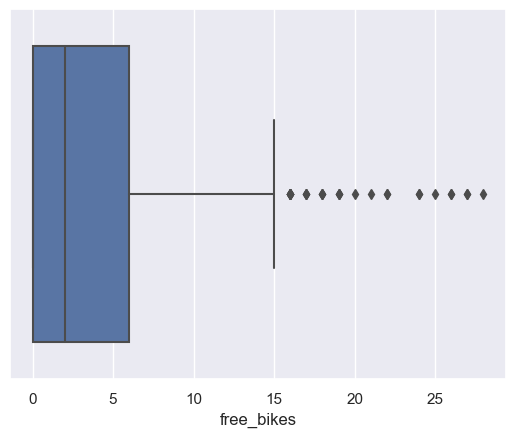

In [60]:
sns.boxplot(x=result['free_bikes'])

<Axes: xlabel='empty_slots'>

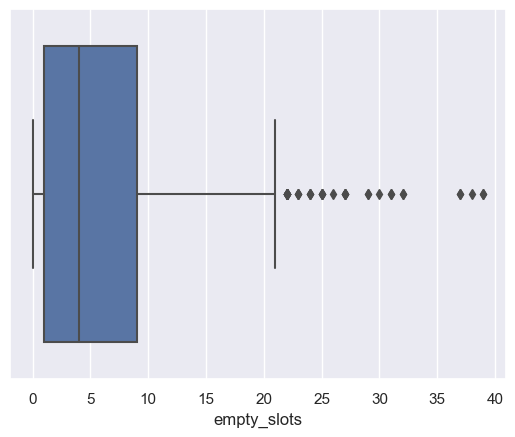

In [61]:
sns.boxplot(x=result['empty_slots'])

<Axes: xlabel='rating'>

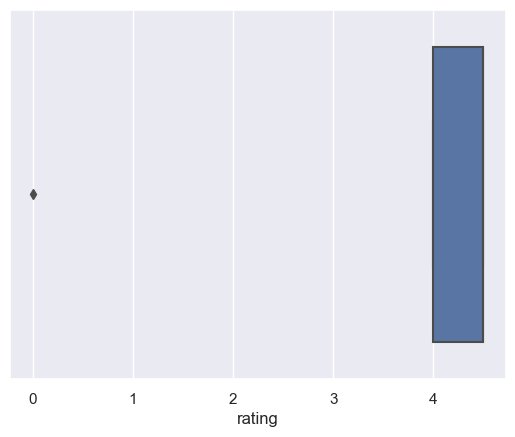

In [62]:
sns.boxplot(x=result['rating'])

visualtion for empty slot

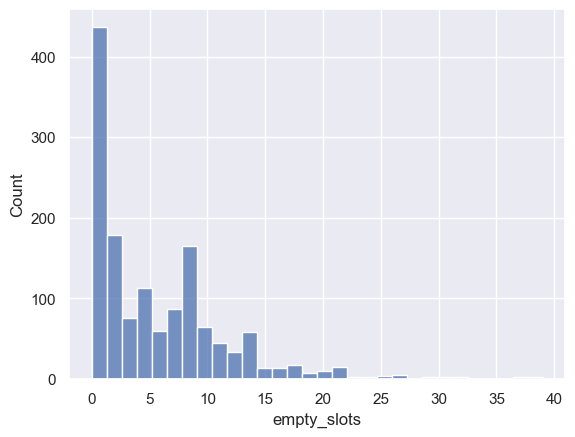

In [63]:
sns.set_theme(context = 'notebook',     #recomend context = 'talk'
              style = 'darkgrid',       
              palette = 'deep',
              font = 'sans-serif',
              font_scale = 1
              ) 

# you could also set a figure size that will affect all sns plots in your notebook
#sns.set(rc={"figure.figsize":(10, 6)}) 

#seaborn histogram
sns.histplot(data=result, x="empty_slots", bins=30)

plt.show()

<Axes: xlabel='review_count', ylabel='Density'>

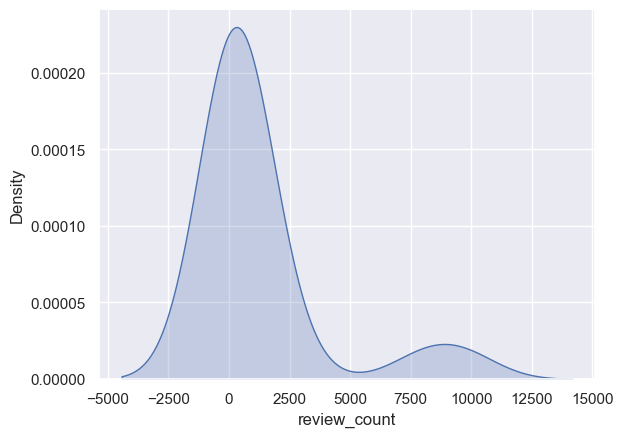

In [64]:
sns.kdeplot(data = result, 
            x="review_count", 
            fill=True)

Multiple Variable in visualization in Density plot

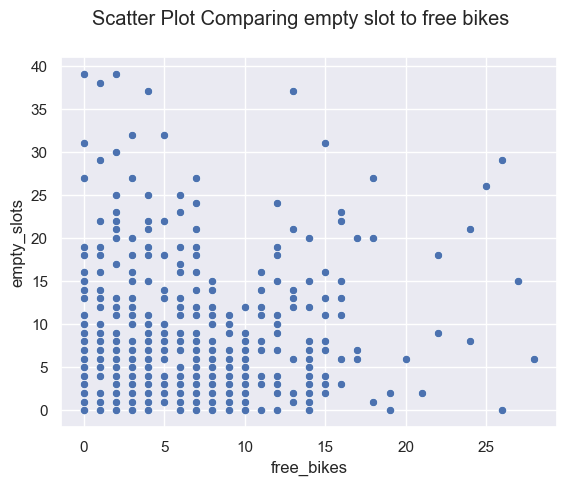

In [70]:
sns.scatterplot(data = result, 
                x = "free_bikes", 
                y = "empty_slots")
plt.suptitle("Scatter Plot Comparing empty slot to free bikes")

plt.show()


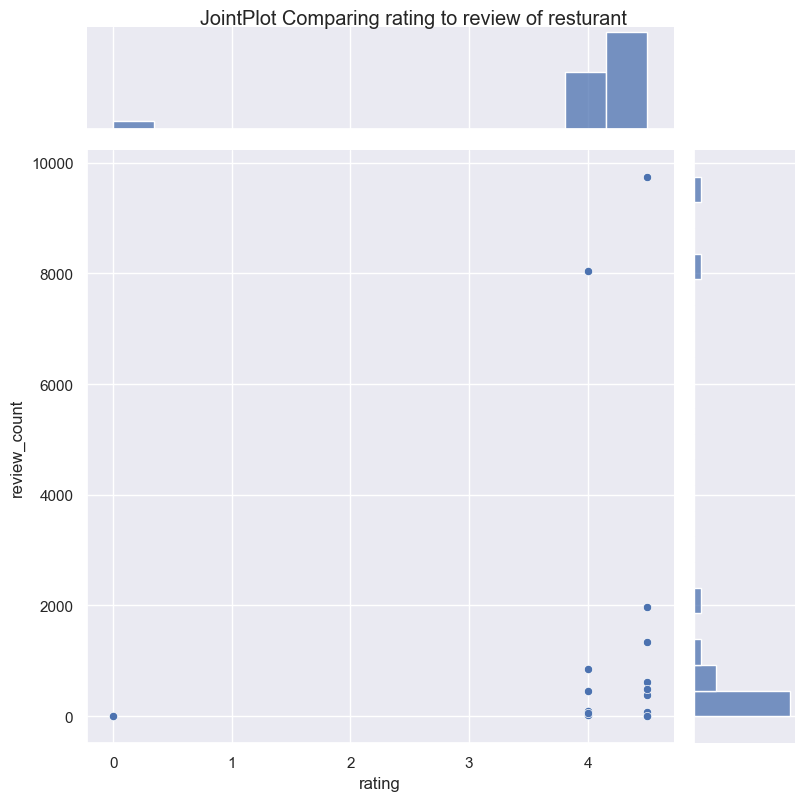

In [73]:
# jointplot = scatter plot + 2 histograms
sns.jointplot(data = result, 
              x = "rating", 
              y = "review_count", 
              height=8,
              ) # a jointplot will be square by default
plt.suptitle("JointPlot Comparing rating to review of resturant", y=1)

plt.show()

In [74]:
result.corr()

C:\Users\14312\AppData\Local\Temp\ipykernel_25112\76870456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result.corr()


,latitude,longitude,free_bikes,empty_slots,review_count,rating,geocodes.main.longitude,geocodes.roof.latitude
latitude,1.000000,-0.537794,0.237155,0.313397,0.235114,-0.192824,-0.166753,-0.087201
longitude,-0.537794,1.000000,0.101719,0.161489,-0.118897,-0.046498,-0.288996,-0.091255
free_bikes,0.237155,0.101719,1.000000,0.265688,0.358647,-0.293378,-0.315936,-0.223658
empty_slots,0.313397,0.161489,0.265688,1.000000,0.436563,0.010236,-0.105698,-0.081046
review_count,0.235114,-0.118897,0.358647,0.436563,1.000000,0.097549,0.014026,-0.097203
rating,-0.192824,-0.046498,-0.293378,0.010236,0.097549,1.000000,0.239795,-0.005644
geocodes.main.longitude,-0.166753,-0.288996,-0.315936,-0.105698,0.014026,0.239795,1.000000,-0.405834
geocodes.roof.latitude,-0.087201,-0.091255,-0.223658,-0.081046,-0.097203,-0.005644,-0.405834,1.000000


C:\Users\14312\AppData\Local\Temp\ipykernel_25112\2270832595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(result.corr())


<Axes: >

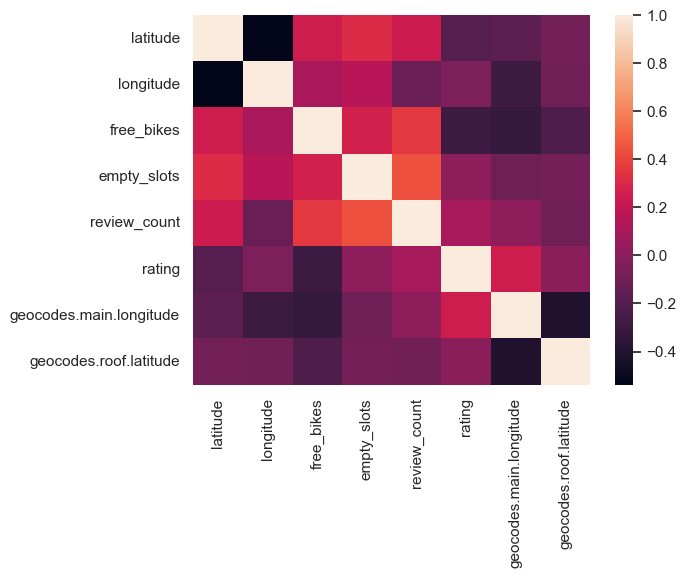

In [75]:
sns.heatmap(result.corr())

array([[<Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='free_bikes', ylabel='latitude'>,
        <Axes: xlabel='empty_slots', ylabel='latitude'>,
        <Axes: xlabel='review_count', ylabel='latitude'>,
        <Axes: xlabel='rating', ylabel='latitude'>,
        <Axes: xlabel='geocodes.main.longitude', ylabel='latitude'>,
        <Axes: xlabel='geocodes.roof.latitude', ylabel='latitude'>],
       [<Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='free_bikes', ylabel='longitude'>,
        <Axes: xlabel='empty_slots', ylabel='longitude'>,
        <Axes: xlabel='review_count', ylabel='longitude'>,
        <Axes: xlabel='rating', ylabel='longitude'>,
        <Axes: xlabel='geocodes.main.longitude', ylabel='longitude'>,
        <Axes: xlabel='geocodes.roof.latitude', ylabel='longitude'>],
       [<Axes: xlabel='latitude', ylabel='free_bikes

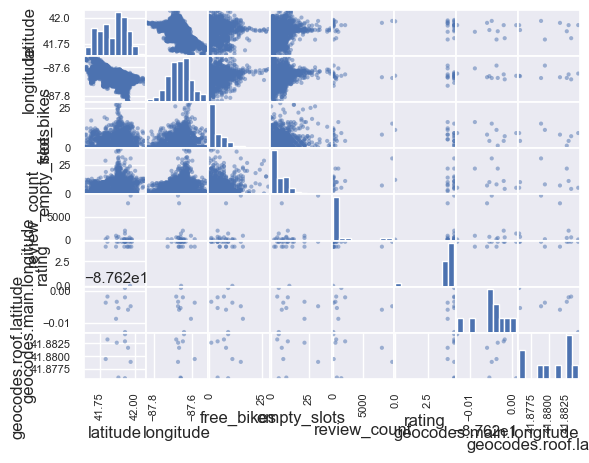

In [79]:
pd.plotting.scatter_matrix(result)